In [1]:
from src.agent import AgentPPT
from src.openai import generate_image, query
from src.ppt_reader import get_shape_content
from src.utils import fromEmus, ppt_to_pdf, pdf_to_img, toEmus, fromPts
from pptx import Presentation
import src.prompts as prompts
import json, os, tempfile, shutil


In [2]:
agent = AgentPPT()
agent.generate_module("Plan a birthday party at the zoo")
agent.save_ppt()


2025-04-03 21:54:31 - AgentPPT instance created with model: gpt-4o, src_path: src_path, dst_path: working.pptx 

2025-04-03 21:54:31 - Cleared chat history. 

2025-04-03 21:54:31 - New presentation created 

2025-04-03 21:54:31 - Generating PowerPoint presentation with prompt: Plan a birthday party at the zoo 

2025-04-03 21:54:31 - Cleared chat history. 

2025-04-03 21:54:31 - New presentation created 

2025-04-03 21:54:40 - Agent response: 
The presentation was updated to include a new title slide "Birthday Party at the Zoo Overview" with details about the event's date, time, location, and theme. Additionally, the "Party Schedule" slide was modified to specify the distribution of goodie bags at the end of the party. 

2025-04-03 21:54:40 - Presentation saved to working.pptx 



In [ ]:
agent = AgentPPT(src_path="working.pptx")
# r = agent.plan_module("Make all text slightly smaller")
agent.save_ppt()

2025-04-03 21:53:24 - Presentation saved to working.pptx 



In [5]:
agent.print_ppt()

[
  {
    "slide_idx": 0,
    "slide_height": 190.5,
    "slide_width": 254.0,
    "slide_background": null,
    "shapes": [
      {
        "index": 0,
        "type": "Title",
        "size": {
          "height": "31.75",
          "width": "228.6"
        },
        "text": "Day 1: Arrival in Tokyo",
        "text_style": {
          "bold": "None",
          "italic": "None",
          "underline": "None",
          "font size": "26.0",
          "color": "None",
          "fill": "None",
          "font style": "None",
          "line_space": "None",
          "align": "None"
        },
        "position": {
          "left": "12.7",
          "top": "7.63"
        }
      },
      {
        "index": 1,
        "type": "Content",
        "size": {
          "height": "125.72",
          "width": "228.6"
        },
        "text": "Morning:\n- Arrive at Narita International Airport\n- Travel to hotel (1 hour)\n- Check-in and rest\nAfternoon:\n- Visit Senso-ji Temple (2 hours)\n- L

In [7]:
agent.plan_module("I'm expecting 3 guests and there should be bird petting")
agent.save_ppt()

2025-04-03 17:46:00 - Calling PLAN module with prompt: I'm expecting 3 guests and there should be bird petting 

2025-04-03 17:46:02 - Calling ACTION module on slide 3 with prompt: Modify the slide to fulfil the following:Update the guest list to reflect 3 expected guests, including children and adults. Remove any mention of special considerations for age-appropriate activities and dietary restrictions. 

2025-04-03 17:46:04 - API - modify_shape | Status - SUCCESS | Shape modified: {"text": "\nOutline the expected number of 3 guests, including children and adults."} | Arguments - {'shape_index': 1, 'instructions': "Update the text to reflect 3 expected guests, including children and adults. Remove any mention of special considerations for age-appropriate activities and dietary restrictions. The updated text should be: '\\nOutline the expected number of 3 guests, including children and adults.'"} 

2025-04-03 17:46:04 - Calling ACTION module on slide 4 with prompt: Modify the slide to f

In [6]:
agent = AgentPPT()
agent.insert_slide()
agent.action_module("""Change the contents of the slide to the folowing.Title: Day 1 - Discover Seoul
Content:
- Morning: Visit Gyeongbokgung Palace
  - Experience the Changing of the Guard ceremony
  - Explore the National Folk Museum
- Afternoon: Stroll through Insadong
  - Enjoy traditional tea houses and shops
- Evening: N Seoul Tower
  - Panoramic views of the city
  - Dine at the revolving restaurant """, slide_idx=0)
agent.save_ppt()

2025-04-02 22:01:18 - AgentPPT instance created with model: gpt-4o, src_path: src_path, dst_path: working.pptx 

2025-04-02 22:01:18 - Cleared chat history. 

2025-04-02 22:01:18 - New presentation created 

2025-04-02 22:01:18 - Calling ACTION module on slide 0 with prompt: Change the contents of the slide to the folowing.Title: Day 1 - Discover Seoul
Content:
- Morning: Visit Gyeongbokgung Palace
  - Experience the Changing of the Guard ceremony
  - Explore the National Folk Museum
- Afternoon: Stroll through Insadong
  - Enjoy traditional tea houses and shops
- Evening: N Seoul Tower
  - Panoramic views of the city
  - Dine at the revolving restaurant  

2025-04-02 22:01:25 - API - modify_shape | Status - SUCCESS | Shape modified: {"text": "Day 1 - Discover Seoul"} | Arguments - {'shape_index': 0, 'instructions': "Change text to 'Day 1 - Discover Seoul'."}
API - modify_shape | Status - SUCCESS | Shape modified: {"text": "\nMorning: Visit Gyeongbokgung Palace\n  Experience the Changi

Conversion completed: 1 files converted successfully, 0 files failed.


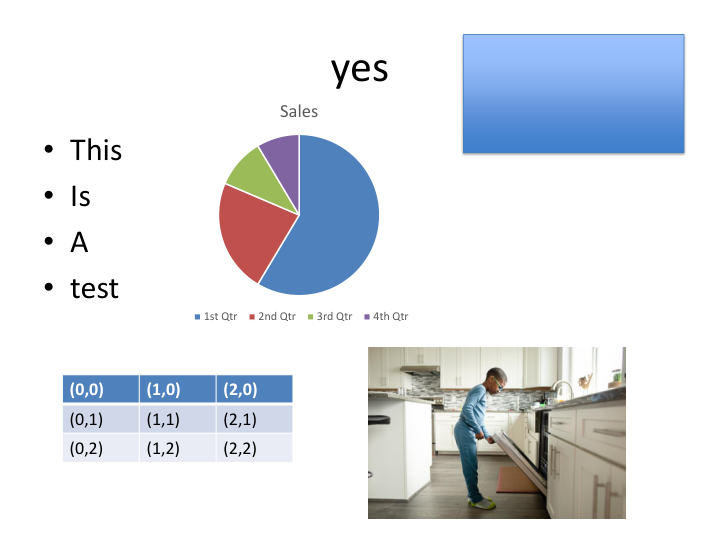

In [3]:
ppt = Presentation("test.pptx")
slide = ppt.slides[0]
shape = slide.shapes[0]


temp_dir = tempfile.mkdtemp()
temp_ppt_path = os.path.join(temp_dir, "temp_presentation.pptx")
ppt.save(temp_ppt_path)
pdf_path = ppt_to_pdf(temp_ppt_path, temp_dir)
imgs = slide_images = pdf_to_img(pdf_path)

shutil.rmtree(temp_dir)

imgs[0]

In [4]:
ppt.slides[-1]